### NBA API

In [2]:
!pip install nba_api

  Using cached nba_api-1.10.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached requests-2.32.4-py3-none-any.whl.metadata (4.9 kB)
  Using cached charset_normalizer-3.4.2-cp313-cp313-macosx_10_13_universal2.whl.metadata (35 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.6.15-py3-none-any.whl.metadata (2.4 kB)
Using cached nba_api-1.10.0-py3-none-any.whl (285 kB)
Using cached requests-2.32.4-py3-none-any.whl (64 kB)
Using cached charset_normalizer-3.4.2-cp313-cp313-macosx_10_13_universal2.whl (199 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached urllib3-2.5.0-py3-none-any.whl (129 kB)
Using cached certifi-2025.6.15-py3-none-any.whl (157 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [nba_api]m5/6 [nba_api]]


In [5]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 164.6 kB/s eta 0:00:0000:0200:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 152.6 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 247.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]


Use the NBA API to determine how well the Golden State Warriors performed against the Toronto Raptors. We will use the API to determine the number of points the Golden State Warriors won or lost by for each game. So if the value of <code>PLUS_MINUS</code> is three, the Golden State Warriors won by three points. Similarly it the Golden State Warriors lost by two points the result will be negative two. The API will handle a lot of the details, such a Endpoints and Authentication

In [3]:
from nba_api.stats.static import teams
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
def one_dict(list_dict):
    keys=list_dict[0].keys() 
    '''
    .keys() is a dictionary method in Python that returns a view of all the keys in the dictionary.
    '''
    output_dict={key:[] for key in keys}
    '''
    this line uses a dictionary comprehension, which is a compact way to create dictionaries in Python.
    It's creating a new dictionary called output_dict.
    For each key in the keys it is adding an empty list []
    "For this key, start with an empty list so we can append values to it later."
    
    Example:
    output_dict = {'id': [], 'name': []}

    '''
    print(output_dict)
    for dict_ in list_dict:
        #we are not using dict here because dict is a built-in type in Python, so dict_ or another name is better
        for key, value in dict_.items():
            output_dict[key].append(value)
    return output_dict

In [8]:
nba_teams = teams.get_teams()
nba_teams[0:3]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Georgia',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

In [20]:
dict_nba_team=one_dict(nba_teams)
print(dict_nba_team)

{'id': [], 'full_name': [], 'abbreviation': [], 'nickname': [], 'city': [], 'state': [], 'year_founded': []}
{'id': [1610612737, 1610612738, 1610612739, 1610612740, 1610612741, 1610612742, 1610612743, 1610612744, 1610612745, 1610612746, 1610612747, 1610612748, 1610612749, 1610612750, 1610612751, 1610612752, 1610612753, 1610612754, 1610612755, 1610612756, 1610612757, 1610612758, 1610612759, 1610612760, 1610612761, 1610612762, 1610612763, 1610612764, 1610612765, 1610612766], 'full_name': ['Atlanta Hawks', 'Boston Celtics', 'Cleveland Cavaliers', 'New Orleans Pelicans', 'Chicago Bulls', 'Dallas Mavericks', 'Denver Nuggets', 'Golden State Warriors', 'Houston Rockets', 'Los Angeles Clippers', 'Los Angeles Lakers', 'Miami Heat', 'Milwaukee Bucks', 'Minnesota Timberwolves', 'Brooklyn Nets', 'New York Knicks', 'Orlando Magic', 'Indiana Pacers', 'Philadelphia 76ers', 'Phoenix Suns', 'Portland Trail Blazers', 'Sacramento Kings', 'San Antonio Spurs', 'Oklahoma City Thunder', 'Toronto Raptors', 'U

In [21]:
df_teams=pd.DataFrame(dict_nba_team)
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [22]:
x = df_teams['nickname']=='Warriors'
x

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
Name: nickname, dtype: bool

In [ ]:
df_warriors=df_teams[df_teams['nickname']=='Warriors']
'''
“Give me only the rows where this condition is True.”
condition = df_teams['nickname'] == 'Warriors'
result = df_teams[condition]
You’re not repeating yourself unnecessarily — you're applying a condition on the same DataFrame.
'''
df_warriors


,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [ ]:
id_warriors=df_warriors[['id']].values[0][0] #.values this converts the DataFrame into a NumPy array
#[0][0]	Get the first row, then the first column value
# we now have an integer that can be used to request the Warriors information 
id_warriors

np.int64(1610612744)

In [ ]:
id_warriors2 = df_warriors['id'].iloc[0] #df_warriors['id'] extracts the 'id' column as a pandas Series.


id_warriors2

np.int64(1610612744)

The parameter <code>team_id_nullable</code> is the unique ID for the warriors. Under the hood, the NBA API is making a HTTP request.\
The information requested is provided and is transmitted via an HTTP response this is assigned to the object <code>game finder</code>.


In [ ]:
from nba_api.stats.endpoints import leaguegamefinder

#nba_api is a package 

In [ ]:
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)
#leaguegamefinder is the Python file (module): leaguegamefinder.py LeagueGameFinder is the class defined inside that file.
gamefinder.get_json()

'{"resource": "leaguegamefinderparameters", "parameters": {"PlayerOrTeam": "T", "LeagueID": null, "Season": null, "SeasonType": null, "TeamID": "1610612744", "VsTeamID": null, "PlayerID": null, "GameID": null, "Outcome": null, "Location": null, "DateFrom": null, "DateTo": null, "VsConference": null, "VsDivision": null, "Conference": null, "Division": null, "DraftYear": null, "DraftNumber": null, "DraftRound": null, "DraftTeamID": null, "RookieYear": null, "YearsExperience": null, "SeasonSegment": null, "PORound": null, "StarterBench": null, "GtPTS": null, "GtREB": null, "GtAST": null, "GtSTL": null, "GtBLK": null, "GtOREB": null, "GtDREB": null, "GtDD": null, "GtTD": null, "GtMINUTES": null, "GtTOV": null, "GtPF": null, "GtFGM": null, "GtFGA": null, "GtFG_PCT": null, "GtFTM": null, "GtFTA": null, "GtFT_PCT": null, "GtFG3M": null, "GtFG3A": null, "GtFG3_PCT": null, "LtPTS": null, "LtREB": null, "LtAST": null, "LtSTL": null, "LtBLK": null, "LtOREB": null, "LtDREB": null, "LtDD": null, "L

In [32]:
import nba_api
print(nba_api.__file__)

/Users/I561411/Library/CloudStorage/OneDrive-SAPSE/Documents/Fellowship/IBM-Course/venv/lib/python3.13/site-packages/nba_api/__init__.py


The game finder object has a method get_data_frames() (from endpoints DataSet class), that returns a dataframe. If we view the dataframe, we can see it contains information about all the games the Warriors played. The PLUS_MINUS column contains information on the score, if the value is negative, the Warriors lost by that many points, if the value is positive, the warriors won by that amount of points. The column MATCHUP has the team the Warriors were playing, GSW stands for Golden State Warriors and TOR means Toronto Raptors. <code>vs </code>signifies it was a home game and the <code>@</code> symbol means an away game.

In [ ]:
print(dir(gamefinder))
#dir() is a built-in Python function that returns a list of all the attributes and methods of an object.

['DataSet', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__firstlineno__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__static_attributes__', '__str__', '__subclasshook__', '__weakref__', 'data_sets', 'endpoint', 'expected_data', 'get_available_data', 'get_data_frames', 'get_dict', 'get_json', 'get_normalized_dict', 'get_normalized_json', 'get_request', 'get_request_url', 'get_response', 'headers', 'league_game_finder_results', 'load_response', 'nba_response', 'parameters', 'player_stats', 'proxy', 'team_stats', 'timeout']


In [35]:
help(gamefinder.get_data_frames)


Help on method get_data_frames in module nba_api.stats.endpoints._base:

get_data_frames() method of nba_api.stats.endpoints.leaguegamefinder.LeagueGameFinder instance



In [ ]:
games = gamefinder.get_data_frames()[0]

''''
class inheritance
I found that class LeagueGameFinder(Endpoint) is dependent on Endpoitn that is another class 
that has a function called get_data_frames()
get_data_frames works on LeagueGameFinder because inherits everything from Endpoint — all its methods, 
properties, and behaviors.

[0] You're selecting the first DataFrame from that list. This is usually the main table you're interested in.
[0] which gives you the first (and usually only) table — typically the list of games for the team.

'''
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22025,1610612744,GSW,Golden State Warriors,1322500004,2025-07-06,GSW vs. SAS,L,201,88,...,0.821,8.0,27.0,35.0,13,7,4,21,25,-2.0
1,22025,1610612744,GSW,Golden State Warriors,1322500002,2025-07-05,GSW vs. LAL,W,201,89,...,0.840,9.0,24.0,33.0,17,8,4,13,23,5.0
2,42024,1610612744,GSW,Golden State Warriors,0042400235,2025-05-14,GSW @ MIN,L,242,110,...,0.700,18.0,22.0,40.0,21,14,1,17,21,-11.0
3,42024,1610612744,GSW,Golden State Warriors,0042400234,2025-05-12,GSW vs. MIN,L,242,110,...,0.848,14.0,24.0,38.0,18,10,1,15,25,-7.0
4,42024,1610612744,GSW,Golden State Warriors,0042400233,2025-05-10,GSW vs. MIN,L,240,97,...,0.810,12.0,24.0,36.0,21,6,7,14,24,-5.0


Another way to get the same dataframe:

In [1]:
import requests

filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl"

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content) #The response body as raw bytes
        '''
    wb is used in files downloaded using response.content
    When you download something via requests, urllib, or pyfetch, 
    the data is transmitted over the internet as raw bytes
        '''
download(filename, "Golden_State.pkl")

In [ ]:
file_name = "Golden_State.pkl"
games = pd.read_pickle(file_name) 
''' 
    read_pickle() it's a function from pandas used for reading serialized Python objects (usually DataFrames) 
    stored in a .pkl file
    .pkl files are not human-readable
'''
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,1521900066,2019-07-12,GSW vs. LAL,L,200,87,...,0.800,13.0,29.0,42.0,13,10.0,3,11.0,21,3.2
1,22019,1610612744,GSW,Golden State Warriors,1521900058,2019-07-10,GSW @ DEN,W,201,73,...,0.867,7.0,27.0,34.0,10,11.0,7,20.0,20,-8.0
2,22019,1610612744,GSW,Golden State Warriors,1521900039,2019-07-08,GSW @ LAL,W,200,88,...,0.621,8.0,29.0,37.0,21,10.0,4,13.0,22,8.0
3,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8.0,3,20.0,25,10.0
4,22019,1610612744,GSW,Golden State Warriors,1521900007,2019-07-05,GSW vs. CHA,L,200,85,...,0.889,8.0,28.0,36.0,19,9.0,3,13.0,15,-8.0


In [5]:
games_home=games[games['MATCHUP']=='GSW vs. TOR']
games_away=games[games['MATCHUP']=='GSW @ TOR']

In [8]:
games_home['PLUS_MINUS'].mean()

np.float64(3.730769230769231)

In [7]:
games_away['PLUS_MINUS'].mean()

np.float64(-0.6071428571428571)

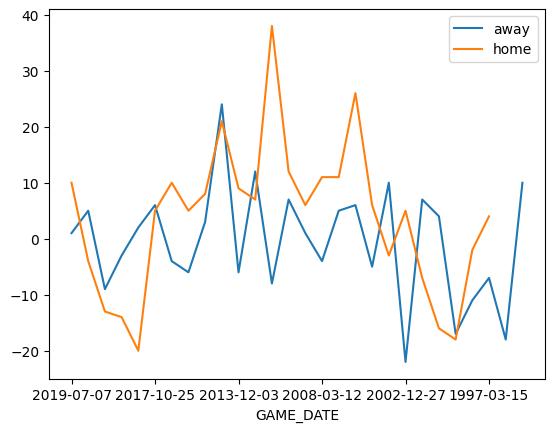

In [ ]:
fig, ax = plt.subplots() #Creates a Figure and Axes object(s)
'''
    .plot() Creates a single line plot directly - from Pandas
    .subplot() Creates a Figure and one or more Axes (subplots) - from Matplot lib

'''

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax) 
#.plot() A built-in method from Pandas to quickly create plots (wraps Matplotlib)
# ax=ax Plots the graph on the existing Matplotlib Axes object (ax) instead of creating a new one

''' 
without ax=ax
Pandas will automatically create a new figure and axes for you

The plot will still work — but it will be harder to customize, combine with other plots, 
or control the layout (e.g., subplots)
'''
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()

<Axes: xlabel='GAME_DATE'>

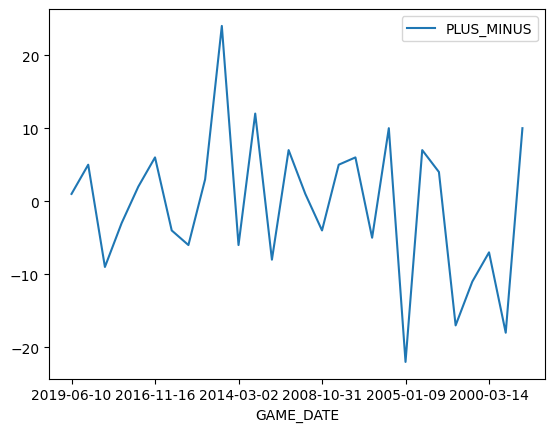

In [17]:
y = games_away.plot(x='GAME_DATE',y='PLUS_MINUS') 
y

In [10]:
games_home['PTS'].mean()

np.float64(106.8076923076923)

In [12]:
games_away['PTS'].mean()

np.float64(102.96428571428571)

An international firm that is looking to expand its business in different countries across the world has recruited you. You have been hired as a junior Data Engineer and are tasked with creating a script that can extract the list of the top 10 largest economies of the world in descending order of their GDPs in Billion USD (rounded to 2 decimal places), as logged by the International Monetary Fund (IMF).

The required data seems to be available on the URL mentioned below: https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29

In [1]:
!pip install lxml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 21.7 MB/s eta 0:00:0000:0100:01


In [2]:
URL="https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29"

In [34]:
# Extract tables from webpage using Pandas. Retain table number 3 as the required dataframe.
import pandas as pd

tables = pd.read_html(URL)
df = tables[3]

# Replace the column headers with column numbers
df.columns = range(df.shape[1])
'''
Useful when:

The file has bad/missing headers.

You plan to rename columns later.

You want to process by index only.
'''
# Retain columns with index 0 and 2 (name of country and value of GDP quoted by IMF)
df = df[[0, 2]]
# Retain the Rows with index 1 to 10, indicating the top 10 economies of the world.
df = df[0:11]

# Assign column names as "Country" and "GDP (Million USD)"
df=df.rename(columns= {0:"Country", 2:"GDP (Million USD)"})

# also works: df.columns = ['Country','GDP (Million USD)']
print(df)


           Country GDP (Million USD)
0            World         105568776
1    United States          26854599
2            China          19373586
3            Japan           4409738
4          Germany           4308854
5            India           3736882
6   United Kingdom           3158938
7           France           2923489
8            Italy           2169745
9           Canada           2089672
10          Brazil           2081235


Modify the GDP column of the DataFrame, converting the value available in Million USD to Billion USD. Use the round() method of Numpy library to round the value to 2 decimal places. Modify the header of the DataFrame to GDP (Billion USD).

In [ ]:
# Change the data type of the 'GDP (Million USD)' column to integer. Use astype() method.

df["GDP (Million USD)"] = df["GDP (Million USD)"].astype(int)

#df = df.astype({"GDP (Million USD)": int})


# Convert the GDP value in Million USD to Billion USD

df["GDP (Million USD)"] = df["GDP (Million USD)"]/1000

# Use numpy.round() method to round the value to 2 decimal places.

import numpy as np

df["GDP (Million USD)"] = np.round(df["GDP (Million USD)"],2)


''' 
df = np.round(df, 2)

np.round(df, 2) is incorrect:

np.round() converts the entire DataFrame into a NumPy array, removing column names, data types, and index labels.

'''
# Rename the column header from 'GDP (Million USD)' to 'GDP (Billion USD)'
df=df.rename(columns= {"GDP (Million USD)":"GDP (Billion USD)"})

df


,Country,GDP (Billion USD)
0,World,105568.78
1,United States,26854.60
2,China,19373.59
3,Japan,4409.74
4,Germany,4308.85
5,India,3736.88
6,United Kingdom,3158.94
7,France,2923.49
8,Italy,2169.74
9,Canada,2089.67


In [30]:
# Load the DataFrame to the CSV file named "Largest_economies.csv"
df.to_csv("Largest_economies.csv")

### Requests and Beatyful Soup

In [36]:
!pip install bs4

  Using cached beautifulsoup4-4.13.4-py3-none-any.whl.metadata (3.8 kB)
  Using cached soupsieve-2.7-py3-none-any.whl.metadata (4.6 kB)
Using cached beautifulsoup4-4.13.4-py3-none-any.whl (187 kB)
Using cached soupsieve-2.7-py3-none-any.whl (36 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [bs4]2/4 [beautifulsoup4]


In [40]:
import requests
from bs4 import BeautifulSoup
'''
    BeautifulSoup represents HTML content as a tree-like structure, allowing for easy navigation.
'''
# Specify the URL of the webpage you want to scrape
url = 'https://en.wikipedia.org/wiki/IBM'
# Send an HTTP GET request to the webpage
response = requests.get(url)
# Store the HTML content in a variable
html_content = response.text
# Create a BeautifulSoup object to parse the HTML
soup = BeautifulSoup(html_content, 'html.parser')
# Display a snippet of the HTML content
#print(soup)

print(html_content[:500]) #[:500] means you're printing only the first 500 characters of the HTML content.



<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vect


In [42]:
print(soup)

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>IBM - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custo

In [44]:
# Find all <a> tags (anchor tags) in the HTML
links = soup.find_all('a')
# Iterate through the list of links and print their text
# Example of anchor tag <a href="https://example.com">Link Text</a>
for link in links:
    print(link.text)

Jump to content
Main page
Contents
Current events
Random article
About Wikipedia
Contact us
Help
Learn to edit
Community portal
Recent changes
Upload file
Special pages








Search

Donate
Create account
Log in
Donate
 Create account
 Log in
learn more
Contributions
Talk

(Top)



1
History




1.1
1910s–1950s




1.2
1960s–1980s




1.3
1990s–2000s




1.4
2010s–present




2
Corporate affairs




2.1
Business trends




2.2
Board and shareholders




2.3
Headquarters and offices




3
Products




3.1
Hardware




3.1.1
Mainframe computers




3.1.2
Microprocessors




3.1.3
Quantum computing




3.2
Software




3.3
Cloud services




3.4
Artificial intelligence




3.5
Consulting




4
Research




4.1
Patents




5
Brand and reputation




5.1
Environmental




5.2
Tax avoidance




6
People and culture




6.1
Employees




6.1.1
Notable current and former employees




6.2
Workplace culture




7
Leadership




7.1
President




7.2
Chairman of the Board




8
See also




9


In [45]:
import requests
url='https://www.ibm.com/'
r=requests.get(url)

In [46]:
r.status_code

200

In [47]:
print(r.request.headers)

{'User-Agent': 'python-requests/2.32.4', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'Cookie': '_abck=1D58DD68CE6443D59501A59A46D46A13~-1~YAAQqQAQAiw7iwiYAQAApKOrGg5zIHzd+y5Fb6MCSFQ5dIHIwqrLX5xm2rVA8Qke1kOlEwRzpSpYngctR9G0mqs9mj8auvyiYNvW6Kh5rBgMG+YhNdj2pKjlxtWZeqn4hw4YGXt8L/V73G3avb6cbYTInB6PFZOv/zZurFVhSMzKgSBEisZ0vcHHcSb4HdkGcQ5xpduPTqgV3U1iDSZWYin1d/vLf1zzHKowopTDEw2Jk7zYz/SIQ7mUtePOofWO8K6SViUnj8XUcxBbt+6VoZrj7rB1qJMp38YxG7sokWX6hvOm5sAAJru4M5VtgQrWNh7DjXUOGx5vIZCC/f+uR5SoOiHJtKilDVDVneSOPR2sAq/6xxTjxsOEa4CclsrerAd1nHIl9/LMKkfNw7EnswUFLPpHLX14GMvsbu3eQljA66ZG42IfV3DjKmNpLA==~-1~-1~-1; bm_sz=6262CF083EA0BB5E617B52D09D6842B7~YAAQqQAQAi07iwiYAQAApKOrGhxmpeN8bNTjIx3KkFAJ08ZjN7HjpWYPFQtuLX9IcaUtWY+fHpkLfhjpxJ+iGTnX0Is+9+Tp/wDVzalgVv/ClhsPCzVu1ePEyVrd4KNMae2rx9DP6Ak1p5l07XSQUvM8SjDbaIx0pNaKR3wfR9a1xYGCICTJ/2raPKpU0YP/m6cH7wmkhJ/REECcgQmZ7t9pdIGY/tuwp4zJzEGHMEb6MtSn/5jzK2kykgeXSDlcTN9VKqq8JoKdHFlD5ceHRRsDvQ53mHBlIfdsFvYDQmnjlWJS8Axdq+w6Msn3Z7ZWnO99H4b

In [48]:
print("request body", r.request.body)

request body None


In [52]:
header=r.headers
print(header)

{'Content-Security-Policy': 'upgrade-insecure-requests', 'x-frame-options': 'SAMEORIGIN', 'Last-Modified': 'Thu, 17 Jul 2025 23:03:53 GMT', 'ETag': '"2a26c-63a2805fccd10-gzip"', 'Accept-Ranges': 'bytes', 'Content-Type': 'text/html;charset=utf-8', 'X-Content-Type-Options': 'nosniff', 'Cache-Control': 'max-age=600', 'Expires': 'Thu, 17 Jul 2025 23:25:13 GMT', 'X-Akamai-Transformed': '0 - 0 -', 'Content-Encoding': 'gzip', 'Date': 'Thu, 17 Jul 2025 23:15:13 GMT', 'Content-Length': '32842', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'Strict-Transport-Security': 'max-age=31536000'}


In [50]:
header['Date']

'Thu, 17 Jul 2025 23:15:13 GMT'

In [55]:
type(header)

requests.structures.CaseInsensitiveDict

In [106]:
import pandas as pd

# Step 1: Convert the dictionary into a list of (key, value) pairs
headers_list = list(header.items())


print(headers_list)
#df = pd.DataFrame(headers_dict) # Tries to treat keys as columns, errors on length

# Step 2: Create DataFrame
df = pd.DataFrame(headers_list, columns=['Header', 'Value'])

df

[('Content-Security-Policy', 'upgrade-insecure-requests'), ('x-frame-options', 'SAMEORIGIN'), ('Last-Modified', 'Thu, 17 Jul 2025 23:03:53 GMT'), ('ETag', '"2a26c-63a2805fccd10-gzip"'), ('Accept-Ranges', 'bytes'), ('Content-Type', 'text/html;charset=utf-8'), ('X-Content-Type-Options', 'nosniff'), ('Cache-Control', 'max-age=600'), ('Expires', 'Thu, 17 Jul 2025 23:25:13 GMT'), ('X-Akamai-Transformed', '0 - 0 -'), ('Content-Encoding', 'gzip'), ('Date', 'Thu, 17 Jul 2025 23:15:13 GMT'), ('Content-Length', '32842'), ('Connection', 'keep-alive'), ('Vary', 'Accept-Encoding'), ('Strict-Transport-Security', 'max-age=31536000')]


,Header,Value
0,Content-Security-Policy,upgrade-insecure-requests
1,x-frame-options,SAMEORIGIN
2,Last-Modified,"Thu, 17 Jul 2025 23:03:53 GMT"
3,ETag,"""2a26c-63a2805fccd10-gzip"""
4,Accept-Ranges,bytes
5,Content-Type,text/html;charset=utf-8
6,X-Content-Type-Options,nosniff
7,Cache-Control,max-age=600
8,Expires,"Thu, 17 Jul 2025 23:25:13 GMT"
9,X-Akamai-Transformed,0 - 0 -


In [107]:
type(headers_list)

list

In [ ]:
r.encoding

'utf-8'

In [71]:
r.text[0:100]

'\n<!DOCTYPE HTML>\n<html lang="en">\n<head>\r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n      \r\n    \r\n  '

Get image:

In [72]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/IDSNlogo.png'

In [73]:
r=requests.get(url)

In [74]:
print(r.headers)

{'Date': 'Fri, 18 Jul 2025 20:46:10 GMT', 'X-Clv-Request-Id': '00de988f-6e5e-4364-9788-e44269345e5c', 'Server': 'Cleversafe', 'X-Clv-S3-Version': '2.5', 'Accept-Ranges': 'bytes', 'x-amz-request-id': '00de988f-6e5e-4364-9788-e44269345e5c', 'ETag': '"8bb44578fff8fdcc3d2972be9ece0164"', 'Content-Type': 'image/png', 'Last-Modified': 'Wed, 16 Nov 2022 03:32:41 GMT', 'Content-Length': '78776'}


In [76]:
!pip install ipython

In [77]:
!pip install pillow

In [ ]:
import os 
from PIL import Image
from IPython.display import IFrame

path=os.path.join(os.getcwd(),'image.png')

#os.getcwd() → gets your current working directory (where your script or terminal is running).
#os.path.join() → safely combines the directory and filename into a full file path.

In [79]:
with open(path,'wb') as f:
    f.write(r.content)

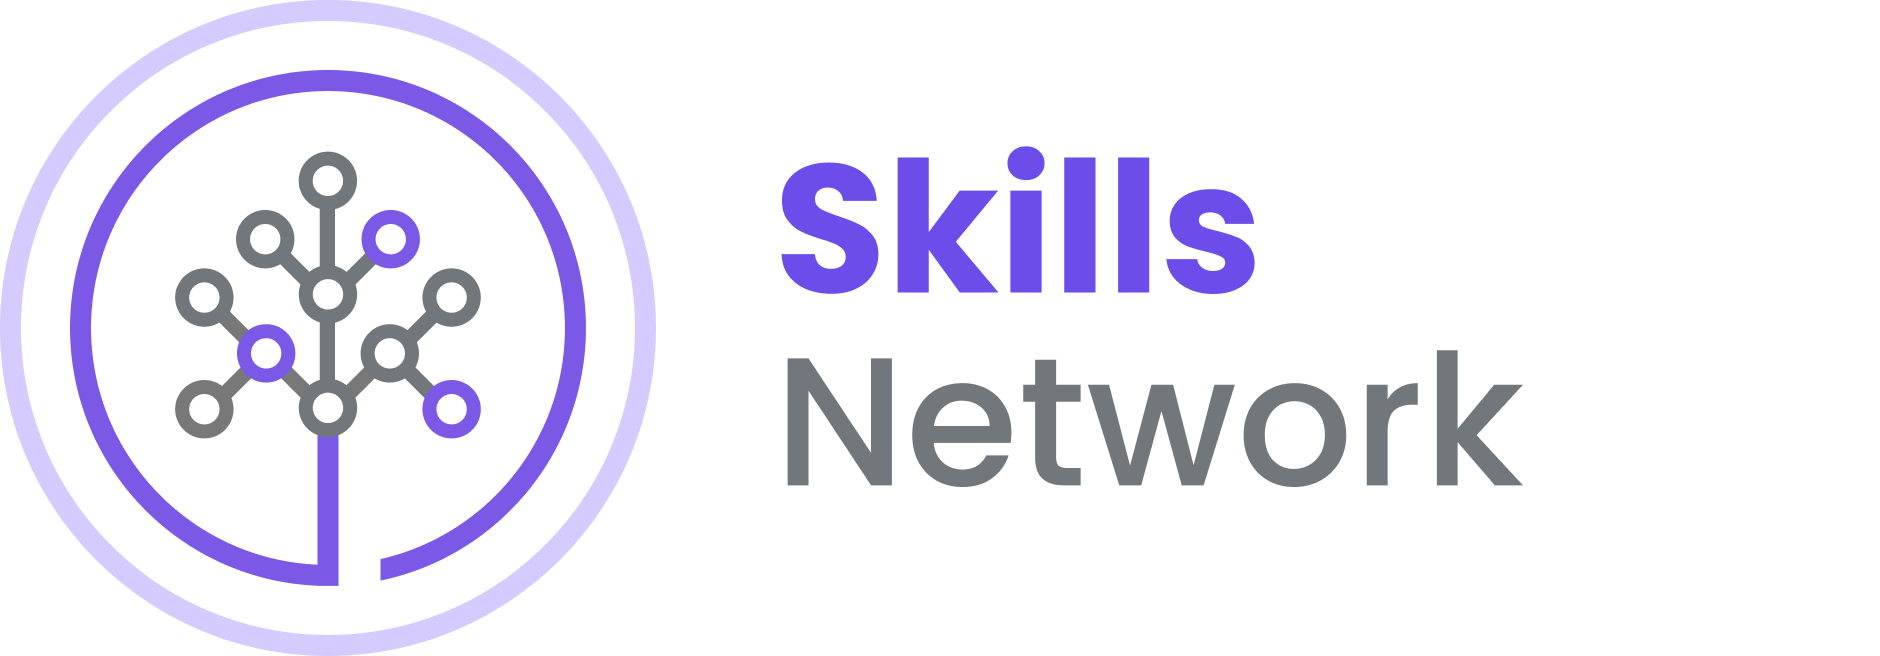

In [80]:
Image.open(path)

Question: Download a file 
Consider the following URL.

URL = <https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/Example1.txt

Write the commands to download the txt file in the given link.

In [81]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/Example1.txt"

In [83]:
import requests
import os

retrieve_url = requests.get(URL)

path = os.path.join(os.getcwd(), "ExercisesURL1.txt")

with open(path, 'wb') as file:
    file.write(retrieve_url.content)


### Using Parameters

In [ ]:
import requests
url_get='http://httpbin.org/get'
payload={"name":"Joseph","ID":"123"}
r=requests.get(url_get,params=payload)

#get(url, params, args)

r.url

'http://httpbin.org/get?name=Joseph&ID=123'

In [85]:
print("request body:", r.request.body)

request body: None


In [86]:
print(r.text)

{
  "args": {
    "ID": "123", 
    "name": "Joseph"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.32.4", 
    "X-Amzn-Trace-Id": "Root=1-687c1178-03dbf44f4636517506c7646c"
  }, 
  "origin": "165.1.220.231", 
  "url": "http://httpbin.org/get?name=Joseph&ID=123"
}



In [87]:
r.headers['Content-Type']

'application/json'

In [88]:
r.json()

{'args': {'ID': '123', 'name': 'Joseph'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.32.4',
  'X-Amzn-Trace-Id': 'Root=1-687c1178-03dbf44f4636517506c7646c'},
 'origin': '165.1.220.231',
 'url': 'http://httpbin.org/get?name=Joseph&ID=123'}

In [89]:
r.json()['args']

{'ID': '123', 'name': 'Joseph'}

### API Post Method

In [91]:
url_post='http://httpbin.org/post'

r_post=requests.post(url_post,data=payload)

In [ ]:
#print("GET request URL:",r.url)
print("POST request URL:", r_post.url)  # Use r_post instead of response

POST request URL: http://httpbin.org/post


In [93]:
print("POST request body:",r_post.request.body)
print("GET request body:",r.request.body)

POST request body: name=Joseph&ID=123
GET request body: None


In [ ]:
r_post.json()['form'] #Data sent via POST method, typically in the body (form-encoded)

{'ID': '123', 'name': 'Joseph'}

### RandomUser API

In [226]:
!pip install randomuser

In [227]:
from randomuser import RandomUser
import pandas as pd

r = RandomUser()
some_list = r.generate_users(10)

some_list


In [228]:
name = r.get_full_name()

name

'Alfredo Williams'

In [229]:
for user in some_list:
    print (user.get_full_name()," ",user.get_email())

Koray Yılmazer   koray.yilmazer@example.com
Annika Trønnes   annika.tronnes@example.com
Ross Porter   ross.porter@example.com
Sigmund Holme   sigmund.holme@example.com
Eugenia Saez   eugenia.saez@example.com
Alicia Fontai   alicia.fontai@example.com
Kayla Wells   kayla.wells@example.com
Gabriel Perez   gabriel.perez@example.com
Rauf Van Zoelen   rauf.vanzoelen@example.com
Bernd Guerin   bernd.guerin@example.com


Exercise 1
In this Exercise, generate photos of the random 10 users.

In [230]:

list_users = RandomUser.generate_users(10)

list_users

In [231]:
for user in list_users:
    print(user.get_picture())

https://randomuser.me/api/portraits/men/12.jpg
https://randomuser.me/api/portraits/women/90.jpg
https://randomuser.me/api/portraits/men/22.jpg
https://randomuser.me/api/portraits/women/72.jpg
https://randomuser.me/api/portraits/women/34.jpg
https://randomuser.me/api/portraits/men/92.jpg
https://randomuser.me/api/portraits/men/64.jpg
https://randomuser.me/api/portraits/women/68.jpg
https://randomuser.me/api/portraits/women/96.jpg
https://randomuser.me/api/portraits/women/4.jpg


In [232]:
def get_users():
    users =[]
     
    for user in RandomUser.generate_users(10):
        users.append({"Name":user.get_full_name(),"Gender":user.get_gender(),"City":user.get_city(),"State":user.get_state(),"Email":user.get_email(), "DOB":user.get_dob(),"Picture":user.get_picture()})
      
    return pd.DataFrame(users) 

get_users()

,Name,Gender,City,State,Email,DOB,Picture
0,Agnès Bonnet,female,Rheinau,Schwyz,agnes.bonnet@example.com,1982-08-12T01:49:10.184Z,https://randomuser.me/api/portraits/women/83.jpg
1,Georgeta Pereira,female,Guarapuava,Rondônia,georgeta.pereira@example.com,1996-02-27T22:22:09.695Z,https://randomuser.me/api/portraits/women/44.jpg
2,Kristupas Aslam,male,Viggja,Trøndelag,kristupas.aslam@example.com,1956-09-28T20:06:24.711Z,https://randomuser.me/api/portraits/men/94.jpg
3,Jeanne Martinez,female,Villeurbanne,Orne,jeanne.martinez@example.com,1971-09-20T14:16:50.619Z,https://randomuser.me/api/portraits/women/33.jpg
4,Fernanda Viana,female,Teixeira de Freitas,Espírito Santo,fernanda.viana@example.com,1995-09-12T01:20:22.465Z,https://randomuser.me/api/portraits/women/82.jpg
5,Gerold Dittmann,male,Tribsees,Hessen,gerold.dittmann@example.com,1973-02-01T06:29:07.081Z,https://randomuser.me/api/portraits/men/96.jpg
6,Nooa Lahti,male,Rantasalmi,Ostrobothnia,nooa.lahti@example.com,1991-03-20T00:22:16.153Z,https://randomuser.me/api/portraits/men/47.jpg
7,Stella Johnson,female,Invercargill,Canterbury,stella.johnson@example.com,1994-07-25T21:36:00.726Z,https://randomuser.me/api/portraits/women/3.jpg
8,Chloe Remen,female,Egersund,Vest-Agder,chloe.remen@example.com,1989-01-20T02:31:31.348Z,https://randomuser.me/api/portraits/women/88.jpg
9,Hemetério Ribeiro,male,Maringá,Roraima,hemeterio.ribeiro@example.com,1991-07-10T09:57:04.027Z,https://randomuser.me/api/portraits/men/42.jpg


In [233]:
df1 = get_users()

df1

,Name,Gender,City,State,Email,DOB,Picture
0,Frederikke Hansen,male,Kvistgaard,Nordjylland,frederikke.hansen@example.com,1985-07-22T22:21:45.080Z,https://randomuser.me/api/portraits/men/57.jpg
1,Luka Melvold,male,Austreim,Vestfold,luka.melvold@example.com,1996-10-17T18:18:58.326Z,https://randomuser.me/api/portraits/men/80.jpg
2,Emilia Lozano,female,Torrejón de Ardoz,Andalucía,emilia.lozano@example.com,1948-06-15T05:19:57.540Z,https://randomuser.me/api/portraits/women/13.jpg
3,Tiago Boyer,male,Tours,Sarthe,tiago.boyer@example.com,1978-02-18T00:22:08.990Z,https://randomuser.me/api/portraits/men/51.jpg
4,Marion Perez,female,Brest,Cantal,marion.perez@example.com,1980-06-10T19:02:42.550Z,https://randomuser.me/api/portraits/women/93.jpg
5,دانیال احمدی,male,کرج,سیستان و بلوچستان,dnyl.hmdy@example.com,1966-08-02T17:48:49.923Z,https://randomuser.me/api/portraits/men/17.jpg
6,Zora Teixeira,female,Birigüi,São Paulo,zora.teixeira@example.com,1966-12-09T03:11:19.652Z,https://randomuser.me/api/portraits/women/64.jpg
7,Matthew Jackson,male,Tauranga,Marlborough,matthew.jackson@example.com,1980-12-10T05:05:35.817Z,https://randomuser.me/api/portraits/men/16.jpg
8,Joshua Stock,male,Straubing-Bogen,Brandenburg,joshua.stock@example.com,1976-03-21T06:45:14.925Z,https://randomuser.me/api/portraits/men/8.jpg
9,Ceyhun Çörekçi,male,Nevşehir,Trabzon,ceyhun.corekci@example.com,1972-04-01T10:40:29.647Z,https://randomuser.me/api/portraits/men/24.jpg


### Fruityvice API

In [115]:
import requests
import json

url = "https://web.archive.org/web/20240929211114/https://fruityvice.com/api/fruit/all"
data = requests.get(url)

x = data.text

results = json.loads(data.text)
results

[{'name': 'Persimmon',
  'id': 52,
  'family': 'Ebenaceae',
  'order': 'Rosales',
  'genus': 'Diospyros',
  'nutritions': {'calories': 81,
   'fat': 0.0,
   'sugar': 18.0,
   'carbohydrates': 18.0,
   'protein': 0.0}},
 {'name': 'Strawberry',
  'id': 3,
  'family': 'Rosaceae',
  'order': 'Rosales',
  'genus': 'Fragaria',
  'nutritions': {'calories': 29,
   'fat': 0.4,
   'sugar': 5.4,
   'carbohydrates': 5.5,
   'protein': 0.8}},
 {'name': 'Banana',
  'id': 1,
  'family': 'Musaceae',
  'order': 'Zingiberales',
  'genus': 'Musa',
  'nutritions': {'calories': 96,
   'fat': 0.2,
   'sugar': 17.2,
   'carbohydrates': 22.0,
   'protein': 1.0}},
 {'name': 'Tomato',
  'id': 5,
  'family': 'Solanaceae',
  'order': 'Solanales',
  'genus': 'Solanum',
  'nutritions': {'calories': 74,
   'fat': 0.2,
   'sugar': 2.6,
   'carbohydrates': 3.9,
   'protein': 0.9}},
 {'name': 'Pear',
  'id': 4,
  'family': 'Rosaceae',
  'order': 'Rosales',
  'genus': 'Pyrus',
  'nutritions': {'calories': 57,
   'fat': 

In [ ]:
df1=pd.DataFrame(results)

'''
You use pd.DataFrame() when you have lists, dicts, or arrays and want to manually structure them into a DataFrame.

'''
df1

,name,id,family,order,genus,nutritions
0,Persimmon,52,Ebenaceae,Rosales,Diospyros,"{'calories': 81, 'fat': 0.0, 'sugar': 18.0, 'c..."
1,Strawberry,3,Rosaceae,Rosales,Fragaria,"{'calories': 29, 'fat': 0.4, 'sugar': 5.4, 'ca..."
2,Banana,1,Musaceae,Zingiberales,Musa,"{'calories': 96, 'fat': 0.2, 'sugar': 17.2, 'c..."
3,Tomato,5,Solanaceae,Solanales,Solanum,"{'calories': 74, 'fat': 0.2, 'sugar': 2.6, 'ca..."
4,Pear,4,Rosaceae,Rosales,Pyrus,"{'calories': 57, 'fat': 0.1, 'sugar': 10.0, 'c..."
5,Durian,60,Malvaceae,Malvales,Durio,"{'calories': 147, 'fat': 5.3, 'sugar': 6.75, '..."
6,Blackberry,64,Rosaceae,Rosales,Rubus,"{'calories': 40, 'fat': 0.4, 'sugar': 4.5, 'ca..."
7,Lingonberry,65,Ericaceae,Ericales,Vaccinium,"{'calories': 50, 'fat': 0.34, 'sugar': 5.74, '..."
8,Kiwi,66,Actinidiaceae,Struthioniformes,Apteryx,"{'calories': 61, 'fat': 0.5, 'sugar': 9.0, 'ca..."
9,Lychee,67,Sapindaceae,Sapindales,Litchi,"{'calories': 66, 'fat': 0.44, 'sugar': 15.0, '..."


In [ ]:
df2 = pd.json_normalize(results)
df2

'''
✅ 2. pd.json_normalize() → Specialized tool for nested JSON
Designed to flatten complex JSON/dict structures into a clean DataFrame.

Handles deeply nested keys and can extract nested fields with dot notation automatically.

Already returns a DataFrame, so you don’t need to wrap it in DataFrame().
'''

,name,id,family,order,genus,nutritions.calories,nutritions.fat,nutritions.sugar,nutritions.carbohydrates,nutritions.protein
0,Persimmon,52,Ebenaceae,Rosales,Diospyros,81,0.00,18.00,18.00,0.00
1,Strawberry,3,Rosaceae,Rosales,Fragaria,29,0.40,5.40,5.50,0.80
2,Banana,1,Musaceae,Zingiberales,Musa,96,0.20,17.20,22.00,1.00
3,Tomato,5,Solanaceae,Solanales,Solanum,74,0.20,2.60,3.90,0.90
4,Pear,4,Rosaceae,Rosales,Pyrus,57,0.10,10.00,15.00,0.40
5,Durian,60,Malvaceae,Malvales,Durio,147,5.30,6.75,27.10,1.50
6,Blackberry,64,Rosaceae,Rosales,Rubus,40,0.40,4.50,9.00,1.30
7,Lingonberry,65,Ericaceae,Ericales,Vaccinium,50,0.34,5.74,11.30,0.75
8,Kiwi,66,Actinidiaceae,Struthioniformes,Apteryx,61,0.50,9.00,15.00,1.10
9,Lychee,67,Sapindaceae,Sapindales,Litchi,66,0.44,15.00,17.00,0.80


In [130]:
cherry = df2.loc[df2["name"] == 'Cherry']

(cherry.iloc[0]['family']) , (cherry.iloc[0]['genus']) #this alone also print the response

print((cherry.iloc[0]['family']) , (cherry.iloc[0]['genus']))

'''
Same as bellow:

family = cherry.iloc[0]['family']
genus = cherry.iloc[0]['genus']

print(family, genus)

'''

Rosaceae Prunus


"\nSame as bellow:\n\nfamily = cherry.iloc[0]['family']\ngenus = cherry.iloc[0]['genus']\n\nprint(family, genus)\n\n"

In [131]:
x = (cherry.iloc[0]['family']) , (cherry.iloc[0]['genus'])
print((x)) #doble patentheses creates a tuple

('Rosaceae', 'Prunus')


Exercise 2
In this Exercise, find out how many calories are contained in a banana.

In [ ]:
banana = df2.loc[df2["name"] == "Banana"] #it is case sensitive

banana

,name,id,family,order,genus,nutritions.calories,nutritions.fat,nutritions.sugar,nutritions.carbohydrates,nutritions.protein
2,Banana,1,Musaceae,Zingiberales,Musa,96,0.2,17.2,22.0,1.0


In [ ]:
calories = banana.iloc[0]["nutritions.calories"]

'''
row = banana.iloc[0]
calories = row["nutritions.calories"]
'''

print(calories)

96


In [140]:
row = banana.iloc[0]
row

name                              Banana
id                                     1
family                          Musaceae
order                       Zingiberales
genus                               Musa
nutritions.calories                   96
nutritions.fat                       0.2
nutritions.sugar                    17.2
nutritions.carbohydrates            22.0
nutritions.protein                   1.0
Name: 2, dtype: object

### Joke API

Exercise 3
This page contains a list of free public APIs for you to practice. Let us deal with the following example.

Official Joke API
This API returns random jokes from a database. The following URL can be used to retrieve 10 random jokes.

https://official-joke-api.appspot.com/jokes/ten

Using requests.get("url") function, load the data from the URL.


In [145]:
import requests

url = "https://official-joke-api.appspot.com/jokes/ten"

r = requests.get(url)

type(r)

requests.models.Response

2. Retrieve results using `json.loads()` function.


In [147]:
import json
results = json.loads(r.text)

3. Convert json data into *pandas* data frame. Drop the type and id columns.


In [157]:
import pandas as pd

df = pd.DataFrame(results)

df2 = df.drop(columns = ['type', 'id'])

df2

,setup,punchline
0,If you put a million monkeys at a million keyb...,the rest of them will write Perl
1,Why did the tomato blush?,Because it saw the salad dressing.
2,Why does Waldo only wear stripes?,Because he doesn't want to be spotted.
3,What did the fish say when it hit the wall?,Dam.
4,I just got fired from my job at the keyboard f...,They told me I wasn't putting in enough shifts.
5,There are 10 types of people in this world...,Those who understand binary and those who don't
6,What musical instrument is found in the bathroom?,A tuba toothpaste.
7,What do you give to a lemon in need?,Lemonaid.
8,What did the big flower say to the littler flo...,"Hi, bud!"
9,Why do choirs keep buckets handy?,So they can carry their tune


### Web Scraping

In [158]:
!pip install scrapy

  Using cached defusedxml-0.7.1-py2.py3-none-any.whl.metadata (32 kB)
  Using cached cffi-1.17.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (1.5 kB)
  Using cached pycparser-2.22-py3-none-any.whl.metadata (943 bytes)
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 187.3 kB/s eta 0:00:00a 0:00:02
Using cached cffi-1.17.1-cp313-cp313-macosx_11_0_arm64.whl (178 kB)
Using cached defusedxml-0.7.1-py2.py3-none-any.whl (25 kB)
Using cached attrs-25.3.0-py3-none-any.whl (63 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 146.5 kB/s eta 0:00:0000:0100:03
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
Using cached pycparser-2.22-py3-none-any.whl (117 kB)
Using cached filelock-3.18.0-py3-none-any.whl (16 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29/29 [scrapy]28/29 [scra

In [159]:
import scrapy
class QuotesSpider(scrapy.Spider):
    name = "quotes"
    start_urls = ['http://quotes.toscrape.com/tag/humor/',]
    def parse(self, response):
        for quote in response.css('div.quote'):
            yield {'quote': quote.css('span.text::text').get()}

In [161]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page

In [162]:
html="<!DOCTYPE html><html><head><title>Page Title</title></head><body><h3><b id='boldest'>Lebron James</b></h3><p> Salary: $ 92,000,000 </p><h3> Stephen Curry</h3><p> Salary: $85,000, 000 </p><h3> Kevin Durant </h3><p> Salary: $73,200, 000</p></body></html>"

In [ ]:
soup = BeautifulSoup(html, 'html.parser') 
#Beautiful Soup transforms a complex HTML document into a complex tree of Python objects.
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Page Title
  </title>
 </head>
 <body>
  <h3>
   <b id="boldest">
    Lebron James
   </b>
  </h3>
  <p>
   Salary: $ 92,000,000
  </p>
  <h3>
   Stephen Curry
  </h3>
  <p>
   Salary: $85,000, 000
  </p>
  <h3>
   Kevin Durant
  </h3>
  <p>
   Salary: $73,200, 000
  </p>
 </body>
</html>



In [165]:
tag_object=soup.title
print("tag object:",tag_object)

tag object: <title>Page Title</title>


In [166]:
type(tag_object)

bs4.element.Tag

If there is more than one Tag with the same name, the first element with that Tag name is called. 

In [167]:
tag_object=soup.h3
tag_object

<h3><b id="boldest">Lebron James</b></h3>

In [ ]:
tag_child =tag_object.b
parent_tag=tag_child.parent
parent_tag #equals to tag_object

<h3><b id="boldest">Lebron James</b></h3>

In [169]:
sibling_1=tag_object.next_sibling
sibling_2=sibling_1.next_sibling
sibling_2

<h3> Stephen Curry</h3>

In [170]:
sibling_3 = sibling_2.next_sibling
sibling_3

<p> Salary: $85,000, 000 </p>

In [171]:
tag_child.attrs

{'id': 'boldest'}

In [172]:
tag_child.get('id')

'boldest'

Navigable String

In [173]:
tag_string=tag_child.string
tag_string

'Lebron James'

In [174]:
table="<table><tr><td id='flight'>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr> <td>1</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a></td><td>300 kg</td></tr><tr><td>2</td><td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td><td>94 kg</td></tr><tr><td>3</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a> </td><td>80 kg</td></tr></table>"

In [192]:
table_bs = BeautifulSoup(table, 'html.parser')

In [179]:
table_rows=table_bs.find_all('tr') #find_all(name, attrs, recursive, string, limit, **kwargs)
table_rows

[<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>,
 <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td><td>300 kg</td></tr>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td><td>80 kg</td></tr>]

In [180]:
first_row =table_rows[0]
first_row

<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>

In [181]:
first_row.td

<td id="flight">Flight No</td>

In [182]:
for i,row in enumerate(table_rows):
    print("row",i,"is",row)

row 0 is <tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>
row 1 is <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td><td>300 kg</td></tr>
row 2 is <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>
row 3 is <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td><td>80 kg</td></tr>


In [183]:
for i,row in enumerate(table_rows):
    print("row",i)
    cells=row.find_all('td')
    for j,cell in enumerate(cells):
        print('colunm',j,"cell",cell)

row 0
colunm 0 cell <td id="flight">Flight No</td>
colunm 1 cell <td>Launch site</td>
colunm 2 cell <td>Payload mass</td>
row 1
colunm 0 cell <td>1</td>
colunm 1 cell <td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td>
colunm 2 cell <td>300 kg</td>
row 2
colunm 0 cell <td>2</td>
colunm 1 cell <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>
colunm 2 cell <td>94 kg</td>
row 3
colunm 0 cell <td>3</td>
colunm 1 cell <td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td>
colunm 2 cell <td>80 kg</td>


In [184]:
list_input=table_bs .find_all(name=["tr", "td"])
list_input

[<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>,
 <td id="flight">Flight No</td>,
 <td>Launch site</td>,
 <td>Payload mass</td>,
 <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td><td>300 kg</td></tr>,
 <td>1</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td>,
 <td>300 kg</td>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <td>2</td>,
 <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>,
 <td>94 kg</td>,
 <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td><td>80 kg</td></tr>,
 <td>3</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td>,
 <td>80 kg</td>]

In [185]:
table_bs.find_all(id="flight")

[<td id="flight">Flight No</td>]

In [186]:
list_input=table_bs.find_all(href="https://en.wikipedia.org/wiki/Florida")
list_input

[<a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a>,
 <a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a>]

In [187]:
table_bs.find_all(href=True)

[<a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a>,
 <a href="https://en.wikipedia.org/wiki/Texas">Texas</a>,
 <a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a>]

Exercise: find_all

Using the logic above, find all the elements without href value

In [193]:
elements_nohref = table_bs.find_all(href = False)

elements_nohref

[<table><tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td><td>300 kg</td></tr><tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr><tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td><td>80 kg</td></tr></table>,
 <tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>,
 <td id="flight">Flight No</td>,
 <td>Launch site</td>,
 <td>Payload mass</td>,
 <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td><td>300 kg</td></tr>,
 <td>1</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td>,
 <a></a>,
 <td>300 kg</td>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <td>2</td>,
 <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>,
 <td>94 k

In [ ]:
boldest = soup.find_all(id="boldest") #using table_bs does not find it

boldest

[<b id="boldest">Lebron James</b>]

It’s useful if you are looking for one element, as you can use the <code>find()</code> method to find the first element in the document.

In [200]:
from bs4 import BeautifulSoup
import requests

url = "http://www.ibm.com"

data = requests.get(url).text

soup = BeautifulSoup(data, "html.parser")

for link in soup.find_all('a', href = True):
    print(link)
   

<a href="https://newsroom.ibm.com/2025-07-08-ibm-power11-raises-the-bar-for-enterprise-it?lnk=hpls1us" target="_self">
<c4d-button-group-item cta-type="local" data-aem-autoid="aem--leadspace_cta-0" data-video-modal-type="media-center" href="https://newsroom.ibm.com/2025-07-08-ibm-power11-raises-the-bar-for-enterprise-it?lnk=hpls1us" kind="primary" target="_self">
<span>Read the announcement</span>
</c4d-button-group-item>
</a>
<a href="https://www.ibm.com/products/power?lnk=hpls2us" target="_self">
<c4d-button-group-item cta-type="local" data-aem-autoid="aem--leadspace_cta-1" data-video-modal-type="media-center" href="https://www.ibm.com/products/power?lnk=hpls2us" kind="tertiary" target="_self">
<span>Explore IBM Power</span>
</c4d-button-group-item>
</a>
<a href="https://www.ibm.com/quantum/blog/quantum-advantage-era?lnk=hprc1us" slot="cta" target="_self">
<p class="caem-tile__link" slot="cta"></p>
</a>
<a href="https://www.ibm.com/new/announcements/maximize-ibm-power-11-with-ibm-tec

### Json Manipulation

In [207]:
import json
person = {
    'first_name' : 'Mark',
    'last_name' : 'abc',
    'age' : 27,
    'address': {
        "streetAddress": "21 2nd Street",
        "city": "New York",
        "state": "NY",
        "postalCode": "10021-3100"
    }
}

In [ ]:
with open('person.json', 'w') as f:  # writing JSON object
    json.dump(person, f)

    '''
    Same as: 

    object = json.dump(person)
    with open('person.json', 'w') as f:  
        f.write(object)


    '''

In [209]:
# Serializing json  
json_object = json.dumps(person, indent = 4) 
  
# Writing to sample.json 
with open("sample.json", "w") as outfile: 
    outfile.write(json_object) 

print(json_object)

{
    "first_name": "Mark",
    "last_name": "abc",
    "age": 27,
    "address": {
        "streetAddress": "21 2nd Street",
        "city": "New York",
        "state": "NY",
        "postalCode": "10021-3100"
    }
}


In [210]:
import json 
  
# Opening JSON file 
with open('sample.json', 'r') as openfile: 
  
    # Reading from json file 
    json_object = json.load(openfile) 
  
print(json_object) 
print(type(json_object)) 

{'first_name': 'Mark', 'last_name': 'abc', 'age': 27, 'address': {'streetAddress': '21 2nd Street', 'city': 'New York', 'state': 'NY', 'postalCode': '10021-3100'}}
<class 'dict'>


### XML Manipulation

The xml.etree.ElementTree module comes built-in with Python. It provides functionality for parsing and creating XML documents. ElementTree represents the XML document as a tree. We can move across the document using nodes which are elements and sub-elements of the XML file.

In [214]:
import xml.etree.ElementTree as ET

# create the file structure
employee = ET.Element('employee')
details = ET.SubElement(employee, 'details')
first = ET.SubElement(details, 'firstname')
second = ET.SubElement(details, 'lastname')
third = ET.SubElement(details, 'age')
first.text = 'Shiv'
second.text = 'Mishra'
third.text = '23'

# create a new XML file with the results
mydata1 = ET.ElementTree(employee)
# myfile = open("items2.xml", "wb")
# myfile.write(mydata)
with open("new_sample.xml", "wb") as files:
    mydata1.write(files)

    #Why 'wb' is used | Because .write() produces bytes, not plain strings

    '''

    Required 'wb':
    When you use .write() with an encoding argument (like 'utf-8'), ElementTree produces bytes.
    Default behavior of ElementTree.write() is to produce bytes, even if you didn’t explicitly specify the encoding.


    When to use 'w'
    If you use .write() with encoding='unicode', ElementTree produces a string.
    '''

In [222]:
import pandas as pd
import requests

filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/Sample-employee-XML-file.xml"

#Reading XML
df=pd.read_xml(filename) 

df.to_csv("employee.csv", index = False)

#Downloading XML
response = requests.get(filename)

with open("Sample-employee-XML-file.xml", "wb") as file:
    file.write(response.content)


In [ ]:
# Parse the XML file
tree = ET.parse("Sample-employee-XML-file.xml")

# Get the root of the XML tree
root = tree.getroot()

# Define the columns for the DataFrame
columns = ["firstname", "lastname", "title", "division", "building", "room"]

# Initialize an empty DataFrame
datatframe = pd.DataFrame(columns=columns)

# Iterate through each node in the XML root
for node in root:
    # Extract text from each element
    firstname = node.find("firstname").text
    lastname = node.find("lastname").text
    title = node.find("title").text
    division = node.find("division").text
    building = node.find("building").text
    room = node.find("room").text
    
    # Create a DataFrame for the current row
    row_df = pd.DataFrame([[firstname, lastname, title, division, building, room]], columns=columns)
    
    # Concatenate with the existing DataFrame
    datatframe = pd.concat([datatframe, row_df], ignore_index=True)


In [225]:
datatframe

,firstname,lastname,title,division,building,room
0,Shiv,Mishra,Engineer,Computer,301,11
1,Yuh,Datta,developer,Computer,303,02
2,Rahil,Khan,Tester,Computer,304,10
3,Deep,Parekh,Designer,Computer,305,14


### Binary File Manipulation

In [2]:
import requests

filename = "https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg"

data = requests.get(filename)

with open("dog.png", "wb") as file:
    file.write(data.content)

    

In [4]:
from PIL import Image 
# Read image 
img = Image.open('./dog.png','r') 
  
# Output Images 
img.show()

### Data Analysis

In [5]:
import requests
import pandas as pd

filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/diabetes.csv"

data = requests.get(filename)

with open ('diabetes.csv', 'wb') as file:
    file.write(data.content)


In [8]:
df = pd.read_csv('diabetes.csv')

print("First 5 rows: ")
df.head(5)

First 5 rows: 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
missing_data = df.isnull()
missing_data.head(5)

#"False" stands for not missing value.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value, "False" means the value is present in the dataset. In the body of the for loop the method ".value_counts()" counts the number of "True" values.

In [36]:
for column in missing_data.columns:
    '''
    - missing_data.columns: Returns the Index object with the column names of the missing_data 
    DataFrame (same columns as df).
    - .values: Converts the Index object to a NumPy array (array of column names).
    - .tolist(): Converts the NumPy array into a Python list of column names.

    An Index is already iterable, meaning you can loop through it directly without converting it to a list.
    '''
    print (missing_data[column].value_counts())
    #print(missing_data.columns) #this is a Index
    #print(missing_data.columns.values)
    #print(type(missing_data.values))
    #print(missing_data.columns.values.tolist())
    print("")  

Pregnancies
False    768
Name: count, dtype: int64

Glucose
False    768
Name: count, dtype: int64

BloodPressure
False    768
Name: count, dtype: int64

SkinThickness
False    768
Name: count, dtype: int64

Insulin
False    768
Name: count, dtype: int64

BMI
False    768
Name: count, dtype: int64

DiabetesPedigreeFunction
False    768
Name: count, dtype: int64

Age
False    768
Name: count, dtype: int64

Outcome
False    768
Name: count, dtype: int64



In [ ]:
df.dtypes #it is a dataframe property

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [17]:
!pip install seaborn

In [ ]:
# import libraries
import matplotlib.pyplot as plt

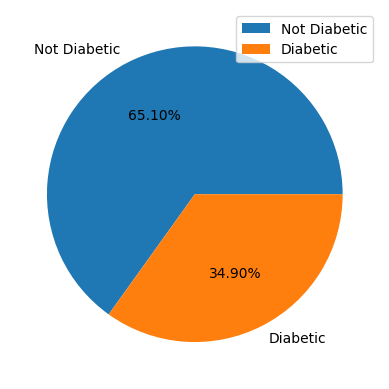

In [ ]:
labels= 'Not Diabetic','Diabetic'
plt.pie(df['Outcome'].value_counts(),labels=labels,autopct='%0.02f%%')
'''
autopct='%0.02f%%' is used in matplotlib pie charts to format the percentage labels displayed on each slice.
autopct Controls how percentages are shown on the pie chart.
'%0.02f%%'  0.02f → shows two decimal places, %% → literal percent sign (%)
'''
plt.legend()
plt.show()